# LAB 05.02 - Model evaluation

## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [3]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 93, 66, 91, 32],
       [ 2, 48, 32, 87, 77],
       [ 3, 56, 22, 65, 43],
       [ 4, 75, 80, 11, 29],
       [ 5, 90, 53, 82, 68],
       [ 6, 27, 54, 30,  2],
       [ 7, 17, 31, 42, 56],
       [ 8, 34, 74, 36, 98],
       [ 9, 51, 52, 46, 62],
       [10,  5, 84, 64, 98],
       [11, 48, 84,  6, 62],
       [12, 97, 68, 22, 61],
       [13, 65, 41, 48, 24],
       [14, 31, 37, 49, 66],
       [15, 86, 57, 46, 42],
       [16, 92, 94, 69, 31],
       [17, 73, 16, 36, 11],
       [18, 57,  3, 75, 87],
       [19, 52, 78, 70,  5]])

In [ ]:
ridxs = np.r_[2,4,5]
x[ridxs]

array([[ 2,  3, 36, 66, 87],
       [ 4, 74, 74, 76, 13],
       [ 5, 58, 24, 96, 84]])

In [ ]:
cidxs = np.r_[1,3]
x[:,cidxs]

array([[ 1,  3],
       [52, 39],
       [ 3, 66],
       [ 5,  5],
       [74, 76],
       [58, 96],
       [87, 55],
       [80, 55],
       [66, 50],
       [23, 50],
       [42, 61],
       [55, 76],
       [91, 43],
       [88, 60],
       [49, 72],
       [ 8, 22],
       [34, 98],
       [35, 69],
       [ 6, 61],
       [14,  5]])

In [ ]:
x[ridxs][:, cidxs]

array([[ 3, 66],
       [74, 76],
       [58, 96]])

and the dimensions of the array are accessible through `len` and `shape`

In [ ]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [ ]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 52, 32, 39, 27],
       [ 2,  3, 36, 66, 87]])

In [ ]:
x[3:]

array([[ 3,  5, 59,  5, 61],
       [ 4, 74, 74, 76, 13],
       [ 5, 58, 24, 96, 84],
       [ 6, 87, 50, 55, 21],
       [ 7, 80, 93, 55,  1],
       [ 8, 66, 52, 50, 61],
       [ 9, 23, 16, 50, 15],
       [10, 42, 84, 61, 95],
       [11, 55, 69, 76, 53],
       [12, 91, 25, 43, 71],
       [13, 88, 35, 60, 22],
       [14, 49, 58, 72, 36],
       [15,  8, 31, 22, 25],
       [16, 34, 15, 98, 17],
       [17, 35, 13, 69, 63],
       [18,  6, 39, 61, 61],
       [19, 14,  4,  5, 64]])

we can do the same thing with vectors

In [ ]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [ ]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [ ]:
np.random.permutation(v)

array([115, 104, 111, 118, 100, 103, 110, 116, 112, 109, 106, 117, 107,
       108, 119, 102, 113, 114, 101, 105])

or the first natural numbers

In [ ]:
p = np.random.permutation(20)
p

array([11, 10,  7,  5, 19, 17,  3,  0, 15,  9, 12, 14,  8,  4, 13,  1,  6,
       18,  2, 16])

how do you interpret this?

In [ ]:
v[19]

119

In [ ]:
v[p[5:]]

array([117, 103, 100, 115, 109, 112, 114, 108, 104, 113, 101, 106, 118,
       102, 116])

In [ ]:
x[p[:5]]

array([[11, 55, 69, 76, 53],
       [10, 42, 84, 61, 95],
       [ 7, 80, 93, 55,  1],
       [ 5, 58, 24, 96, 84],
       [19, 14,  4,  5, 64]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct` 
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [ ]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [ ]:
def split_data(X, y, pct):
    
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    
    permutation = np.random.permutation(len(y))
    n1_elements = int(len(y) * pct)
    permutation_partition_1 = permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]
    X1 = X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]
    y2 = y[permutation_partition_2]
    return X1, X2, y1, y2

check your solution manually with the following code

In [ ]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 70 52 27 94 78 68 59]
 [ 2  7 64 88 43 63 42 13]
 [ 3 15 66 48 69  2 95 52]
 [ 4 89 11 23 34 88  4 64]
 [ 5 14 95 90 97 93 58 91]
 [ 6 30 45 61 97 68 22 58]
 [ 7 57 51 78 61 80 56 86]
 [ 8  8 35 39 42 55 90 87]
 [ 9 14 49 11 48 93 67 25]
 [10 50 76 74 79 40 62 88]
 [11 32 73  8 41 35 87 48]
 [12 88 53  9 55 86 76 35]
 [13 12 97 48 79 61 36 77]
 [14 80 61 18 32 93 15 89]
 [15  3 59 66  1 17 64 71]
 [16 92 98  4 39 83 97 88]
 [17 64 20 74 45 96 45 40]
 [18 53 75 28 78 84 16 78]
 [19 76 12 10 39 29 91 16]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [ ]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [ ]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(7541, 7541, 2190, 2190)

In [ ]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[ 9 14 49 11 48 93 67 25]
 [ 4 89 11 23 34 88  4 64]
 [13 12 97 48 79 61 36 77]
 [ 2  7 64 88 43 63 42 13]
 [10 50 76 74 79 40 62 88]
 [ 6 30 45 61 97 68 22 58]
 [18 53 75 28 78 84 16 78]
 [ 1 70 52 27 94 78 68 59]
 [ 8  8 35 39 42 55 90 87]
 [ 3 15 66 48 69  2 95 52]
 [ 7 57 51 78 61 80 56 86]
 [16 92 98  4 39 83 97 88]
 [ 5 14 95 90 97 93 58 91]
 [14 80 61 18 32 93 15 89]] 
--
[[15  3 59 66  1 17 64 71]
 [11 32 73  8 41 35 87 48]
 [ 0  1  2  3  4  5  6  7]
 [17 64 20 74 45 96 45 40]
 [12 88 53  9 55 86 76 35]
 [19 76 12 10 39 29 91 16]] 
--
[109 104 113 102 110 106 118 101 108 103 107 116 105 114] 
--
[115 111 100 117 112 119] 
--


In [ ]:
Xts

array([[15,  3, 59, 66,  1, 17, 64, 71],
       [11, 32, 73,  8, 41, 35, 87, 48],
       [ 0,  1,  2,  3,  4,  5,  6,  7],
       [17, 64, 20, 74, 45, 96, 45, 40],
       [12, 88, 53,  9, 55, 86, 76, 35],
       [19, 76, 12, 10, 39, 29, 91, 16]])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

In [ ]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

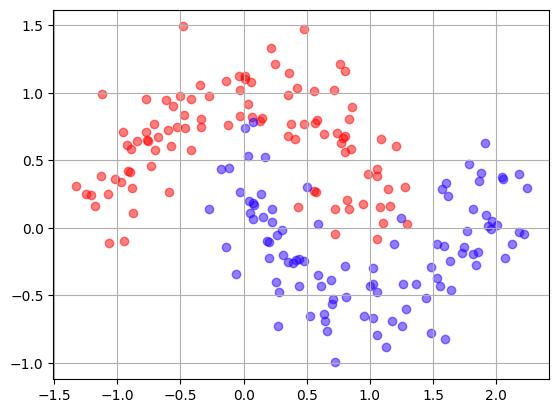

In [ ]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(0.4903, 0.5097)

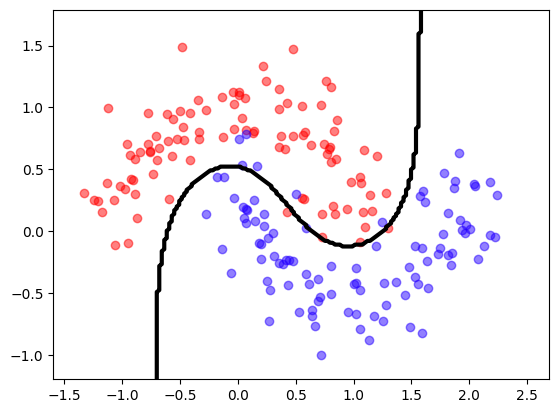

In [ ]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [ ]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [ ]:
7//2

3

In [ ]:
def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"
    n1_elements = int(len(y)//2)
    X1 = X[:n1_elements]
    X2 = X[n1_elements:]
    y1 = y[:n1_elements]
    y2 = y[n1_elements:]

    estimator.fit(X1,y1)
    predictions = estimator.predict(X2)
    
    return estimator, predictions

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [ ]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [ ]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[1 1 9 4 8 8 0 9 2 8 7 8 5 9 4]


In [ ]:
y_less_than_5 = y<5
print (y_less_than_5)

[ True  True False  True False False  True False  True False False False
 False False  True]


and how we can select elements of a vector using a boolean vector of the same length

In [ ]:
y[y_less_than_5]

array([1, 1, 4, 0, 2, 4])

In [ ]:
y[y<5]

array([1, 1, 4, 0, 2, 4])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [ ]:
v = np.random.randint(20, size=15)
v

array([10, 17, 19, 12, 16, 19,  8, 18, 13, 10, 11, 16,  2,  3,  5])

In [ ]:
v[y<5]

array([10, 17, 12,  8, 13,  5])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [ ]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])



In [ ]:
X[y == 0]

array([[8, 8, 5, 2, 0, 0],
       [4, 4, 8, 1, 3, 7],
       [4, 5, 3, 6, 9, 6],
       [0, 3, 5, 3, 5, 3],
       [2, 5, 7, 3, 8, 0],
       [7, 2, 5, 9, 8, 7]])

In [1]:
def select_per_class(X, y):
    X1 = X[y == 0]
    X2 = X[y == 1]
    return X1, X2

In [4]:
X = np.array([[3, 0, 4, 2, 0, 0],
              [4, 4, 8, 0, 3, 7],
              [4, 5, 3, 5, 9, 0],
              [3, 3, 5, 3, 5, 3],
              [1, 7, 0, 7, 6, 5]])

In [5]:
y = np.array([1, 1, 0, 0, 1])

In [6]:
select_per_class(X, y)

(array([[4, 5, 3, 5, 9, 0],
        [3, 3, 5, 3, 5, 3]]),
 array([[3, 0, 4, 2, 0, 0],
        [4, 4, 8, 0, 3, 7],
        [1, 7, 0, 7, 6, 5]]))

check manually your code

In [ ]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [ ]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])



In [ ]:
a == b

array([ True, False, False, False, False,  True,  True, False])

In [ ]:
np.mean(a == b)

0.375

In [ ]:
def accuracy(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    result = sum(y_true == y_pred)/len(y_true)
    return result

In [ ]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

0.375

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [ ]:

def split_fit_predict(estimator, X, y, train_pct):
  def split_data(X, y, pct):
    
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    
    permutation = np.random.permutation(len(y))
    n1_elements = int(len(y) * pct)
    permutation_partition_1 = permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]
    X1 = X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]
    y2 = y[permutation_partition_2]
    return X1, X2, y1, y2

  def accuracy(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    result = sum(y_true == y_pred)/len(y_true)
    return result
    
  Xtr, Xts, ytr, yts = split_data(X, y, train_pct)
  
  estimator.fit(Xtr, ytr)
  preds_ts = estimator.predict(Xts)
  return estimator, Xts, yts, accuracy(yts, preds_ts)
        
        

In [ ]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(),
 array([[-0.9181469 ,  0.66825977],
        [ 0.46354662, -0.337158  ],
        [ 0.50940277, -0.38372276],
        [-0.17668924,  1.21020062],
        [ 0.01564551,  0.98758175],
        [ 0.53461946,  0.80351031],
        [-0.94375954,  0.34054199],
        [ 0.02092788,  0.33306936],
        [ 0.65126429, -0.43790811],
        [-0.42141532,  1.18349553]]),
 array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0]),
 0.9)

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_05");
